In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.reuters import load_data

In [3]:
(X_train, y_train), (X_test, y_test) = load_data(num_words=None, test_split=0.2)

print('훈련용 뉴스 기사 : {}'.format(len(X_train)))
print('테스트용 뉴스 기사 : {}'.format(len(X_test)))
num_classes = len(set(y_train))
print('카테고리 : {}'.format(num_classes))

훈련용 뉴스 기사 : 8982
테스트용 뉴스 기사 : 2246
카테고리 : 46


In [4]:
print('첫번째 훈련용 뉴스 기사 :',X_train[0])
print('첫번째 훈련용 뉴스 기사의 레이블 :',y_train[0])

첫번째 훈련용 뉴스 기사 : [1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
첫번째 훈련용 뉴스 기사의 레이블 : 3


뉴스 기사의 최대 길이 :2376
뉴스 기사의 평균 길이 :145.5398574927633


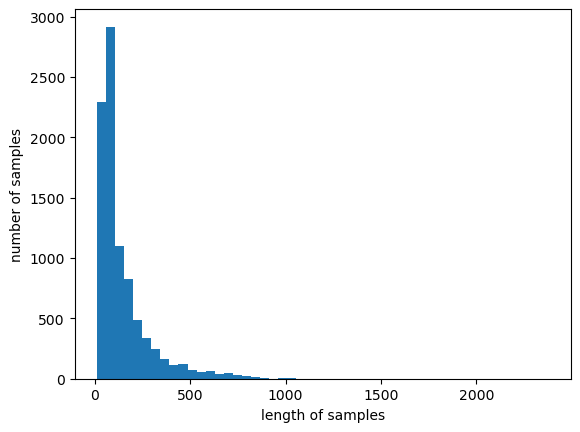

In [5]:
print('뉴스 기사의 최대 길이 :{}'.format(max(len(sample) for sample in X_train)))
print('뉴스 기사의 평균 길이 :{}'.format(sum(map(len, X_train))/len(X_train)))

plt.hist([len(sample) for sample in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

C:\Users\msi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

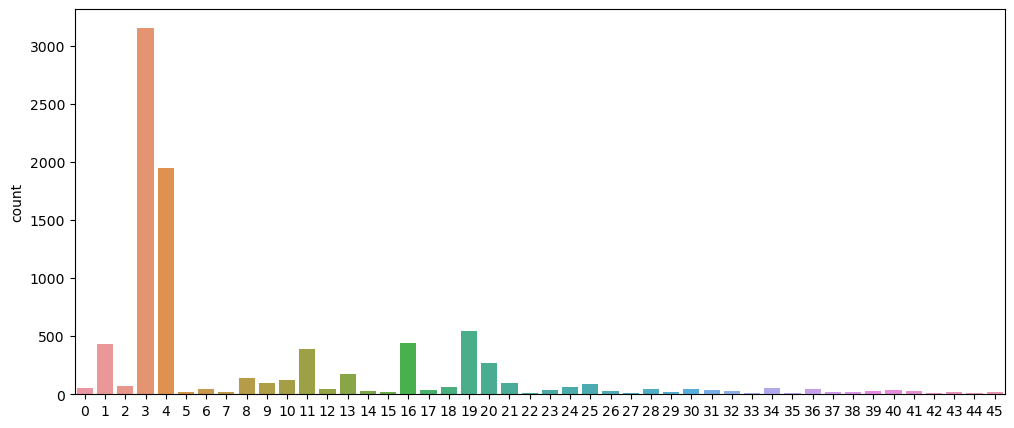

In [6]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12,5)
sns.countplot(y_train)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

vocab_size = 1000
max_len = 100

(X_train, y_train), (X_test, y_test) = load_data(num_words=vocab_size, test_split=0.2)

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#### LSTM

In [9]:
embedding_dim = 128
hidden_units = 128
num_classes = 46

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(num_classes, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_train, y_train, batch_size=128, epochs=30, callbacks=[es, mc], validation_data=(X_test, y_test))

Epoch 1/30
71/71 [==============================] - ETA: 0s - loss: 2.6170 - acc: 0.3458
Epoch 1: val_acc improved from -inf to 0.36198, saving model to best_model.h5
71/71 [==============================] - 26s 324ms/step - loss: 2.6170 - acc: 0.3458 - val_loss: 2.4231 - val_acc: 0.3620
Epoch 2/30
71/71 [==============================] - ETA: 0s - loss: 2.3262 - acc: 0.3781
Epoch 2: val_acc improved from 0.36198 to 0.44034, saving model to best_model.h5
71/71 [==============================] - 22s 303ms/step - loss: 2.3262 - acc: 0.3781 - val_loss: 2.1351 - val_acc: 0.4403
Epoch 3/30
71/71 [==============================] - ETA: 0s - loss: 1.9277 - acc: 0.5090
Epoch 3: val_acc improved from 0.44034 to 0.51202, saving model to best_model.h5
71/71 [==============================] - 21s 301ms/step - loss: 1.9277 - acc: 0.5090 - val_loss: 1.8524 - val_acc: 0.5120
Epoch 4/30
71/71 [==============================] - ETA: 0s - loss: 1.7439 - acc: 0.5470
Epoch 4: val_acc improved from 0.51202

In [11]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 3s 31ms/step - loss: 1.2364 - acc: 0.7075

 테스트 정확도: 0.7075


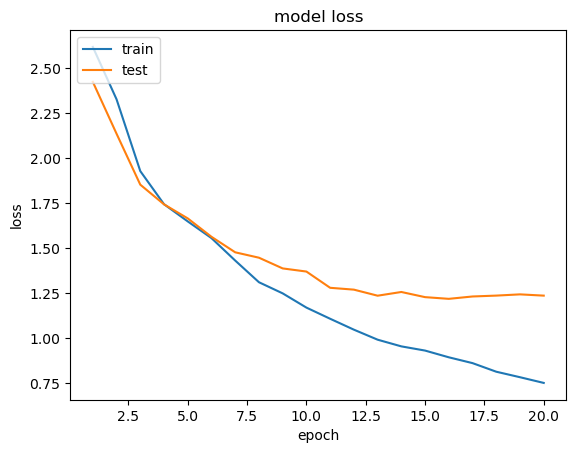

In [12]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### GRU

In [14]:
from tensorflow.keras.layers import GRU

embedding_dim = 128
hidden_units = 128
num_classes = 46

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units,activation='tanh',recurrent_activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model_GRU.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_train, y_train, batch_size=128, epochs=30, callbacks=[es, mc], validation_data=(X_test, y_test))

Epoch 1/30
71/71 [==============================] - ETA: 0s - loss: 2.5459 - acc: 0.3557
Epoch 1: val_acc improved from -inf to 0.42787, saving model to best_model.h5
71/71 [==============================] - 23s 273ms/step - loss: 2.5459 - acc: 0.3557 - val_loss: 2.0092 - val_acc: 0.4279
Epoch 2/30
71/71 [==============================] - ETA: 0s - loss: 1.9091 - acc: 0.4658
Epoch 2: val_acc improved from 0.42787 to 0.46438, saving model to best_model.h5
71/71 [==============================] - 19s 262ms/step - loss: 1.9091 - acc: 0.4658 - val_loss: 1.8897 - val_acc: 0.4644
Epoch 3/30
71/71 [==============================] - ETA: 0s - loss: 1.7390 - acc: 0.5463
Epoch 3: val_acc improved from 0.46438 to 0.56233, saving model to best_model.h5
71/71 [==============================] - 19s 261ms/step - loss: 1.7390 - acc: 0.5463 - val_loss: 1.7275 - val_acc: 0.5623
Epoch 4/30
71/71 [==============================] - ETA: 0s - loss: 1.6371 - acc: 0.5804
Epoch 4: val_acc improved from 0.56233

In [17]:
loaded_model = load_model('best_model_GRU.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 2s 23ms/step - loss: 1.2588 - acc: 0.7061

 테스트 정확도: 0.7061


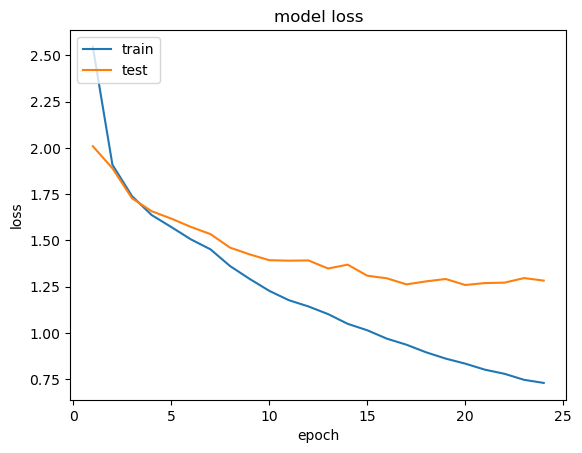

In [18]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()